# Regression Machine Learning Assignment

# 1: Problem Definition
# Business or Research Problem:
Predicting house rental prices based on various features.
# Goal:
Build a regression model to predict the rental price.
# Success Criteria:
Use metrics like RMSE and R² to evaluate model performance.

# 2: Data Collection
# Data Source:
Dataset: [House Rent Prediction Dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset?select=House_Rent_Dataset.csv)

# Data Description:

**Features**:

BHK: Number of bedrooms, hall, and kitchen.

Size: The area of the house in square feet.

Floor: The floor number on which the house is located.

Area Type: The type of area (e.g., Super built-up Area, Built-up Area).

City: The city where the property is located.

Furnishing Status: Whether the house is furnished, semi-furnished, or unfurnished.

Tenant Preferred: The preferred type of tenants (e.g., Bachelors, Family).

Bathroom: Number of bathrooms.

Point of Contact: Who to contact for renting (e.g., Owner, Agent).

Target:
Monthly Rent (Price in INR).

# Data Representation:
The dataset provides a comprehensive set of features representing key aspects of house rental decisions, making it suitable for regression tasks to predict house rent.

In [1]:
import pandas as pd

# Load the dataset from a local file
dataset_path = "./House_Rent_Dataset.csv"
data = pd.read_csv(dataset_path)

# 3: Data Exploration and Preparation

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Exploratory Data Analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [3]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [4]:
data.isnull().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


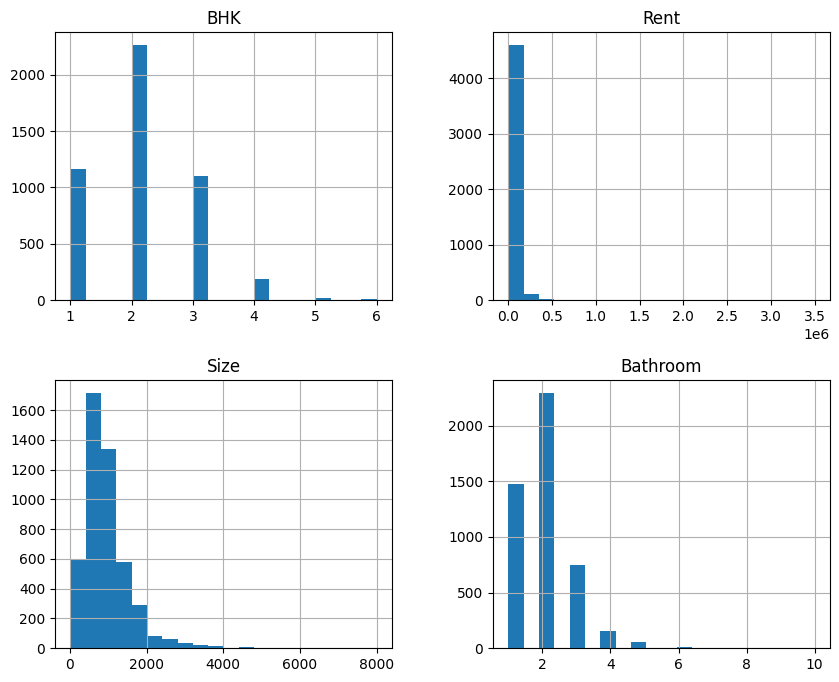

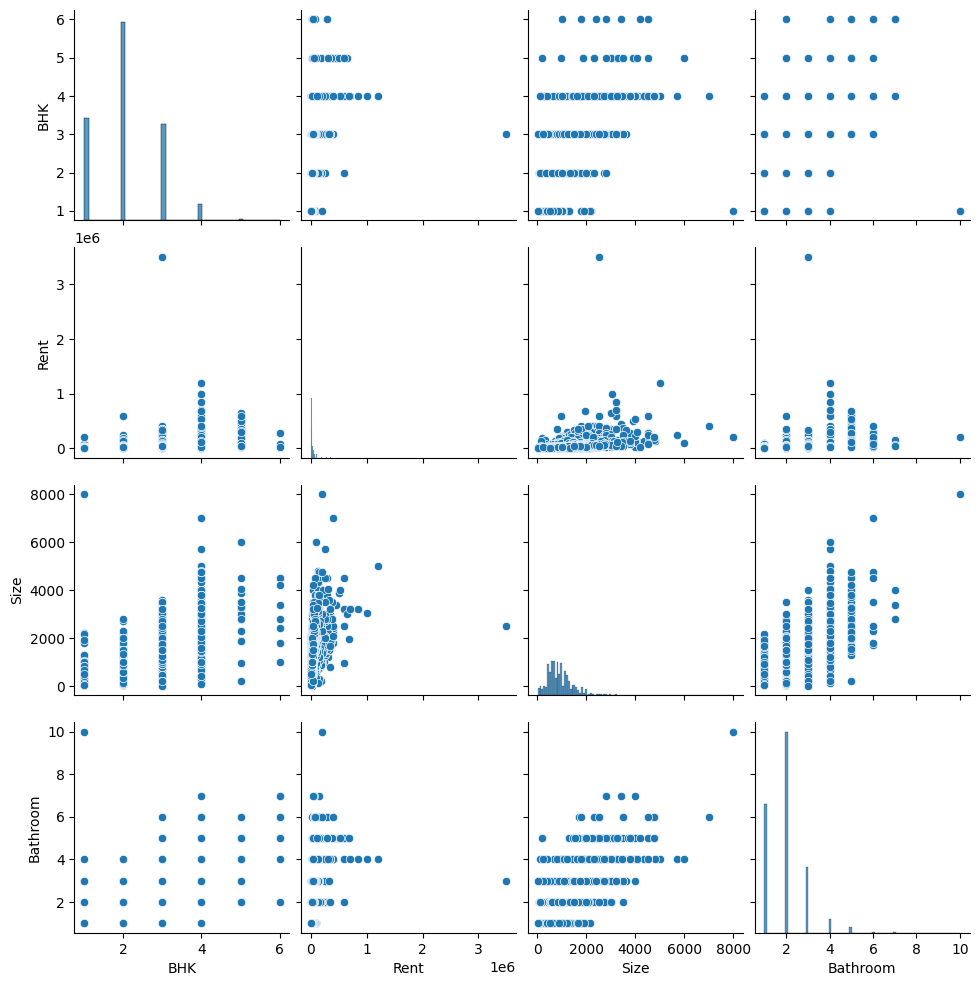

In [5]:
# Visualize data
data.hist(bins=20, figsize=(10, 8))
plt.show()
sns.pairplot(data)

In [6]:
# Data Cleaning
data.dropna(inplace=True)  # Handle missing values

In [7]:
# Feature Engineering
categorical_columns = ["City", "Furnishing Status"]  # Example categorical features
numerical_columns = ["BHK", "Size", "Bathroom"]  # Example numerical features
target_column = "Rent"

In [8]:
# Splitting Data
X = data[categorical_columns + numerical_columns]
y = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Preprocessing Pipeline
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)])

# 4: Algorithm Selection

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Choose the model
model = RandomForestRegressor(random_state=42)

# 5: Model Development and Training

In [11]:
# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['BHK', 'Size', 'Bathroom']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['City',
                                                   'Furnishing Status'])])),
                ('model', RandomForestRegressor(random_state=42))])

# 6: Model Evaluation and Hyperparameter Tuning

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Evaluate model on test data
y_pred = pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

RMSE: 43548.176015757745
R²: 0.5241500164294051


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
# Hyperparameter Tuning
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'model__max_depth': 10, 'model__n_estimators': 50}


# 7: Model Testing and Deployment

In [15]:
import joblib

# Save the model
joblib.dump(grid_search.best_estimator_, 'house_rent_model.pkl')

['house_rent_model.pkl']

In [16]:
# Load and use the model for predictions
loaded_model = joblib.load('house_rent_model.pkl')
sample_data = X_test.iloc[0:1]
print("Sample Prediction:", loaded_model.predict(sample_data))

Sample Prediction: [16763.3701376]
